In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

pb.pltutils.use_style()
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


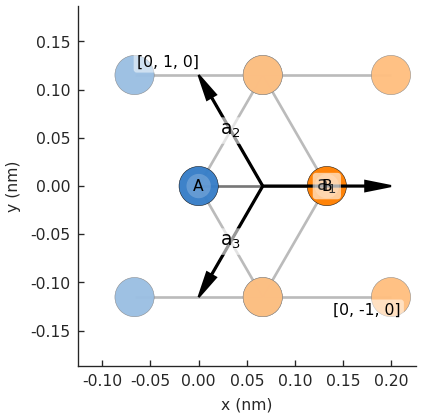

In [5]:
import pybinding as pb
from math import sqrt, pi


def Honeycomb_lattice(d, t=-1,v=0):
    a=sqrt(3)*d #nearest A-A or B-B distance. 
    lat = pb.Lattice(a1=[d, 0], a2=[-d/2,d*sqrt(3)/2 ],a3=[-d/2,-d*sqrt(3)/2])  # for the black line, the end is at a1 = (0.133, 0), a2 = [-.0665, .115], a3 = [-.0665, -.115]
    lat.add_sublattices(('A', [0, 0],v),('B',[d,0],v))  # Add atom A nad B at [0,0] and [d,0]
    lat.add_hoppings(([0, 0,0], 'A', 'B', t),  # Hopping from A to B in 0,0,0 direction, t -> hopping energy in eV
                     ([0, 1,0], 'A', 'B', t),
                     ([0, 0,1], 'A', 'B', t),
                     )      # It is symmetric, need 
    return lat

# we can quickly set a shorter unit length `d`
lattice = Honeycomb_lattice(d=0.133)
lattice.plot()
plt.show()

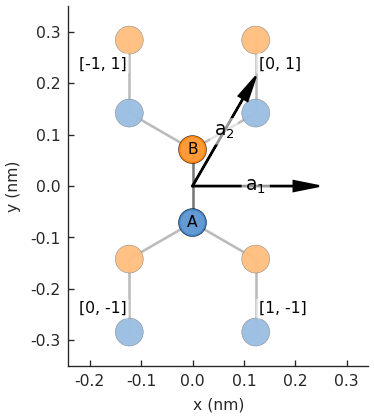

In [6]:
##One way to incorporate the graphene lattice 

from math import sqrt
a_cc = 0.142  # [nm] carbon-carbon distance
def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -1      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()

model=pb.Model(monolayer_graphene(),pb.translational_symmetry(a1=True,a2=True))
#model.plot()


solver = pb.solver.lapack(model)

Gamma = [0, 0]
K1 = [-4*pi / (3*sqrt(3)*a_cc), 0]
M = [0, 2*pi / (3*a_cc)]
K2 = [2*pi / (3*sqrt(3)*a_cc), 2*pi / (3*a_cc)]

bands = solver.calc_bands(K1,Gamma, M, K2)
#bands.plot(point_labels=['K',r'$\Gamma$', 'M','K'])

plt.show()


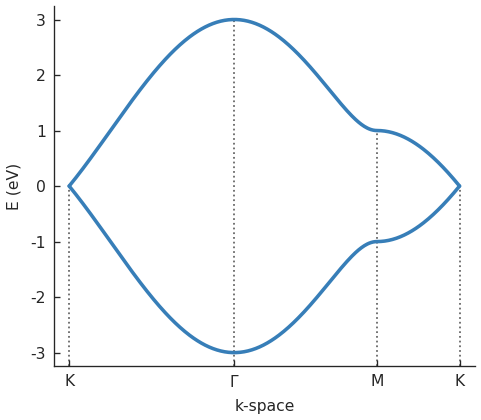

a 0.24595121467478054


In [4]:
#Another way to incorporate the graphene lattice 

from math import sqrt
a_cc = 0.142  # [nm] carbon-carbon distance
a = a_cc*sqrt(3)   # [nm] unit cell length

def monolayer_graphene():
    a_cc = 0.142  # [nm] carbon-carbon distance
    a = a_cc*sqrt(3)   # [nm] unit cell length
    t = 1      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a*sqrt(3)/2, -a/2],
                     a2=[a*sqrt(3)/2, a/2])
    lat.add_sublattices(('A', [0, 0]),
                        ('B', [a_cc, 0]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([-1, 0], 'A', 'B', t),
        ([0, 1], 'B', 'A', t)
    )
    return lat

lattice = monolayer_graphene()
#lattice.plot()
#plt.show()

model=pb.Model(monolayer_graphene(),pb.translational_symmetry(a1=True,a2=True))
#model=pb.Model(monolayer_graphene(),pb.primitive(a1=10,a2=10))

#model.plot()

solver = pb.solver.lapack(model)
#ibz=2*pi/a
#Gamma = [0, 0]
#K1 = [-(ibz*2)/3,ibz/3]
#M = [ibz/2,ibz/2]
#K2 = [(ibz*2)/3,ibz/3]

#a_cc = graphene.a_cc
Gamma = [0, 0]
K1 = [0, -4*pi / (3*sqrt(3)*a_cc),]
M = [2*pi / (3*a_cc),0]
K2 = [2*pi / (3*a_cc),2*pi / (3*sqrt(3)*a_cc)]

bands = solver.calc_bands(K1,Gamma, M, K2)
bands.plot(point_labels=['K',r'$\Gamma$', 'M','K'])

plt.show()
print('a',a)


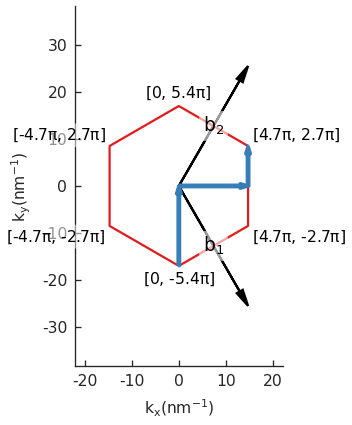

In [5]:
#Plot the Brillouin-Zone 

model.lattice.plot_brillouin_zone()
bands.k_path.plot()

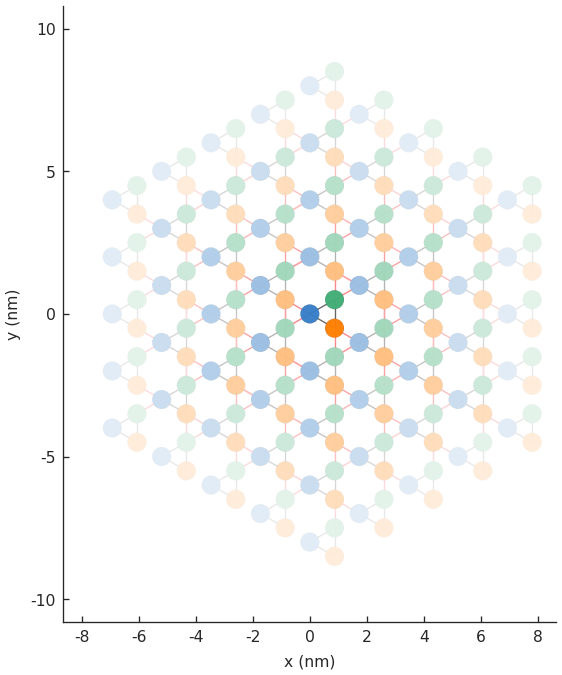

In [6]:
#One way to incorporate the Kagome lattice 

import pybinding as pb
from math import sqrt, pi


def Kagome_lattice(d, t=-1,v=0):
    a_cc = d # near-neighbor distance in the lattice
    a=a_cc*2
    lat = pb.Lattice(a1=[a*sqrt(3)/2, -a/2],
                     a2=[a*sqrt(3)/2, a/2])
    lat.add_sublattices(('A', [0, 0],v),('B',[a*sqrt(3)/4,-a/4],v),('C',[a*sqrt(3)/4,a/4],v))
    lat.add_hoppings(([0,0],'B','A',t),
                     ([1,0],'B','A',t),
                     ([0,0],'C','B',t),
                     ([-1,1],'C','B',t),
                     ([0,0],'A','C',t),
                     ([0,-1],'A','C',t),
                    )
    return lat


# we can quickly set a shorter unit length `d`
lattice = Kagome_lattice(d=1)
#lattice.plot()

model = pb.Model(Kagome_lattice(d=1), pb.translational_symmetry(a1=True,a2=True))
#model = pb.Model(Kagome_lattice(d=0.133), pb.primitive(a1=4,a2=4))

#model.plot()

plt.figure(figsize=(5, 5))
model.plot(num_periods=4)


solver = pb.solver.lapack(model)
d=1
#a=sqrt(3)*d
a=2*d
Gamma = [0, 0]
#K1 = [0, -4*pi / (3*sqrt(3)*d),]
#M = [2*pi / (3*d),0]
#K2 = [2*pi / (3*d),2*pi   / (3*sqrt(3)*d)]

K1 = [0, -4*pi / (3*a),]
M = [2*pi / (sqrt(3)*a),0]
K2 = [2*pi / (sqrt(3)*a),2*pi / (3*a)]

#K1 = [0, -4*pi / (2*sqrt(3)*a),]
#M = [2*pi / (2*a),0]
#K2 = [2*pi / (2*a),2*pi / (2*sqrt(3)*a)]

bands = solver.calc_bands(K1,Gamma, M, K2)
#bands.plot(point_labels=['K',r'$\Gamma$', 'M','K'])

plt.show()



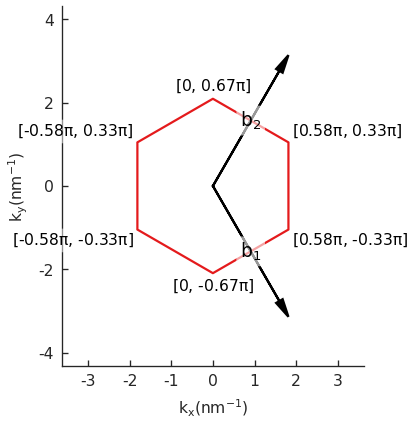

In [7]:
model.lattice.plot_brillouin_zone()


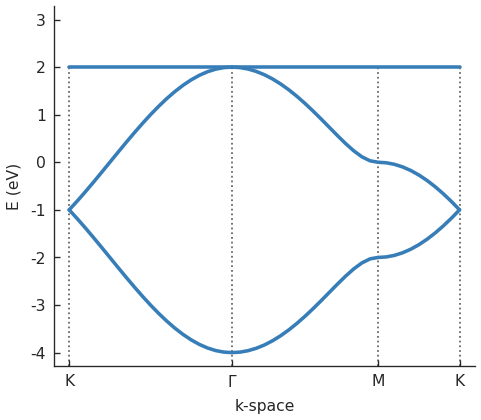

In [8]:
#Plot bands of the Kagome lattice 

import pybinding as pb
from math import sqrt, pi


def Kagome_lattice(d, t=-1,v=0):
    a_cc = d # near-neighbor distance in the lattice
    a=a_cc*2
    lat = pb.Lattice(a1=[a*sqrt(3)/2, -a/2],
                     a2=[a*sqrt(3)/2, a/2])
    lat.add_sublattices(('A',[a*sqrt(3)/4,-a/4],v),('B',[a*sqrt(3)/4,a/4],v),('C', [0, 0],v))
    lat.add_hoppings(([0,0],'A','C',t),
                     ([1,0],'A','C',t),
                     ([0,0],'B','A',t),
                     ([-1,1],'B','A',t),
                     ([0,0],'C','B',t),
                     ([0,-1],'C','B',t),
                    )
    return lat


# we can quickly set a shorter unit length `d`
lattice = Kagome_lattice(d=1)
#lattice.plot()

model = pb.Model(Kagome_lattice(d=1), pb.translational_symmetry(a1=True,a2=True))
#model = pb.Model(Kagome_lattice(d=0.133), pb.primitive(a1=8,a2=8))

#model.plot()

solver = pb.solver.lapack(model)
d=1
#a=sqrt(3)*d
a=2*d
Gamma = [0, 0]
#K1 = [0, -4*pi / (3*sqrt(3)*d),]
#M = [2*pi / (3*d),0]
#K2 = [2*pi / (3*d),2*pi   / (3*sqrt(3)*d)]

K1 = [0, -4*pi / (3*a),]
M = [2*pi / (sqrt(3)*a),0]
K2 = [2*pi / (sqrt(3)*a),2*pi / (3*a)]

#K1 = [0, -4*pi / (2*sqrt(3)*a),]
#M = [2*pi / (2*a),0]
#K2 = [2*pi / (2*a),2*pi / (2*sqrt(3)*a)]

bands = solver.calc_bands(K1,Gamma, M, K2)
bands.plot(point_labels=['K',r'$\Gamma$', 'M','K'])

plt.show()


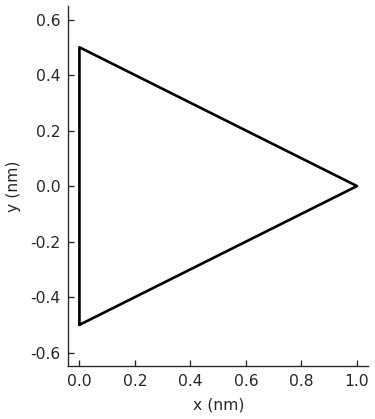

In [9]:
#Creating a triangular polygon 

from math import sqrt
def triangle_rot(a,b,c,shx,shy):
#    d=0.1
#    x0 = side / 2
#    y0 = sqrt(3)*side / 2
    return pb.Polygon([[shx,-a/2+shy], [shx,b/2+shy], [c+shx,shy]])
#    return pb.Polygon([[-a/2, 0], [b/2, 0], [0, c/2]])
shape = triangle_rot(1,1,1,0,0)
shape.plot()

In [10]:
#Vacancy modifier

def vacancy(position, radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return modifier

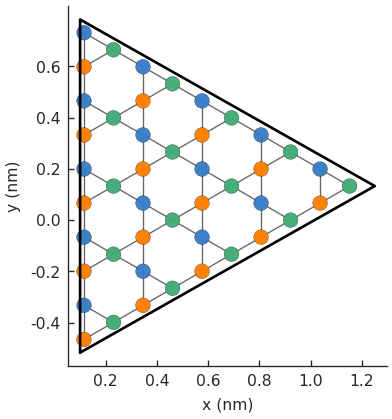

In [11]:
#Creating a triangular patch of the Kagome 

#shape = triangle_rot(1.197,1.197,1.03663240832997306016,.11518137870333034001)  # ideal values for d=0.133
shape = triangle_rot(1.3,1.3,1.15,.10,0.133)  # adjusted which works for d=0.133

model = pb.Model(Kagome_lattice(d=0.133), shape)
model.plot()
shape.plot()

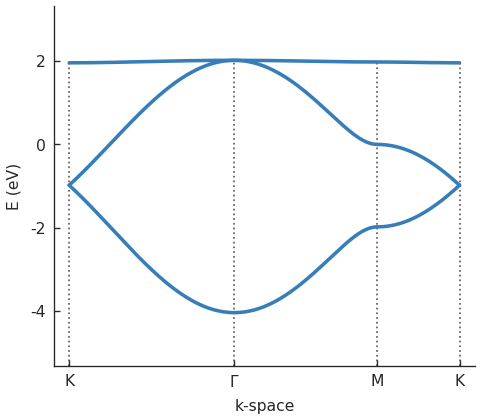

In [12]:
#Kagome lattice with a Hamiltonian that has more free model-parameters 

import pybinding as pb
from math import sqrt, pi


def Kagome_lattice(d, t_a=-1,t_b=-1,t_nnn=0,v_a=0,v_b=0,v_c=0):   # more parameters of kagome lattice
    a_cc = d # near-neighbor distance in the lattice
    a=a_cc*2
    lat = pb.Lattice(a1=[a*sqrt(3)/2, -a/2],
                     a2=[a*sqrt(3)/2, a/2])
    lat.add_sublattices(('A',[a*sqrt(3)/4,-a/4],v_a),('B',[a*sqrt(3)/4,a/4],v_b),('C', [0, 0],v_c))
    lat.add_hoppings(([0,0],'A','C',t_a),
                     ([1,0],'A','C',t_b),
                     ([0,0],'B','A',t_a),
                     ([-1,1],'B','A',t_b),
                     ([0,0],'C','B',t_a),
                     ([0,-1],'C','B',t_b),
                     ([1,0],'A','B',t_nnn),
                     ([1,0],'B','C',t_nnn),
                     ([0,1],'B','A',t_nnn),
                     ([0,1],'A','C',t_nnn),
                     ([-1,1],'C','A',t_nnn),
                     ([-1,1],'B','C',t_nnn),
                    )
    return lat


# we can quickly set a shorter unit length `d`
lattice = Kagome_lattice(d=1)
#lattice.plot()

model = pb.Model(Kagome_lattice(d=0.133,t_a=-1,t_b=-1,t_nnn=-0.01), pb.translational_symmetry(a1=True,a2=True))
#model = pb.Model(Kagome_lattice(d=0.133), pb.primitive(a1=4,a2=4))

#model.plot()

solver = pb.solver.lapack(model)
d=0.133
#a=sqrt(3)*d
a=2*d
Gamma = [0, 0]
#K1 = [0, -4*pi / (3*sqrt(3)*d),]
#M = [2*pi / (3*d),0]
#K2 = [2*pi / (3*d),2*pi   / (3*sqrt(3)*d)]

K1 = [0, -4*pi / (3*a),]
M = [2*pi / (sqrt(3)*a),0]
K2 = [2*pi / (sqrt(3)*a),2*pi / (3*a)]

#K1 = [0, -4*pi / (2*sqrt(3)*a),]
#M = [2*pi / (2*a),0]
#K2 = [2*pi / (2*a),2*pi / (2*sqrt(3)*a)]

bands = solver.calc_bands(K1,Gamma, M, K2)
bands.plot(point_labels=['K',r'$\Gamma$', 'M','K'])

plt.show()

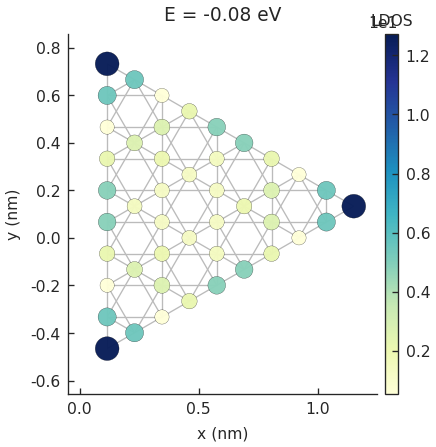

In [13]:
#Solving the model to get the local density of states (LDOS); 

model = pb.Model(Kagome_lattice(d=0.133,t_a=0.0285,t_b=0.075), shape)
energy=-0.08
plt.title("E = {} eV".format(energy))

#solver = pb.solver.arpack(model, k=3, sigma=energy)
solver= pb.solver.lapack(model)
ldos_map = solver.calc_spatial_ldos(energy=energy, broadening=0.003)
ldos_map.plot()
pb.pltutils.colorbar(label="LDOS")

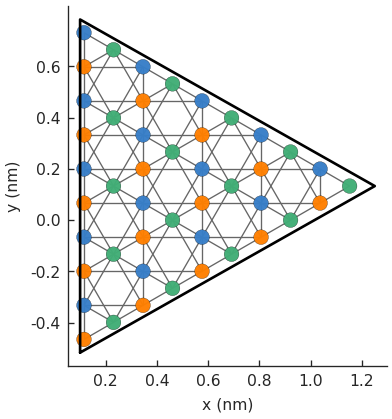

In [14]:
#Example of changing the shape/Hamiltnian model

#shape = triangle_rot(1.197,1.197,1.03663240832997306016,.11518137870333034001)  # ideal values for d=0.133
shape = triangle_rot(1.3,1.3,1.15,.10,0.133)  # adjusted which works for d=0.133

model = pb.Model(Kagome_lattice(d=0.133), shape,vacancy([5,0],0.1))   #
model.plot()
shape.plot()

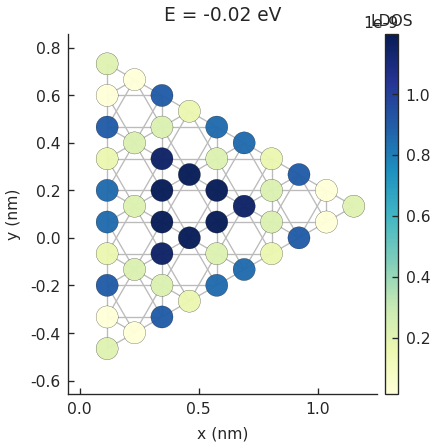

In [15]:
#Plotting LDOS

model = pb.Model(Kagome_lattice(d=0.133,t_a=0.0285,t_b=0.075,t_nnn=0.01875), shape,vacancy([5,0],0.8))
energy=-0.020
plt.title("E = {} eV".format(energy))

#solver = pb.solver.arpack(model, k=3, sigma=energy)
solver= pb.solver.lapack(model)
ldos_map = solver.calc_spatial_ldos(energy=energy, broadening=0.003)
ldos_map.plot()
pb.pltutils.colorbar(label="LDOS")

##### This code will perform the following tasks: 

1. Generate a Kagome lattice with periodic boundary conditions
2. Modify lattice sites to create artificial strtuctures   
3. Loop over lattice sites, onsite potentials and hoppings 
4. Create band-structure and LDOS 

# Generate a Kagome lattice with periodic boundary conditions

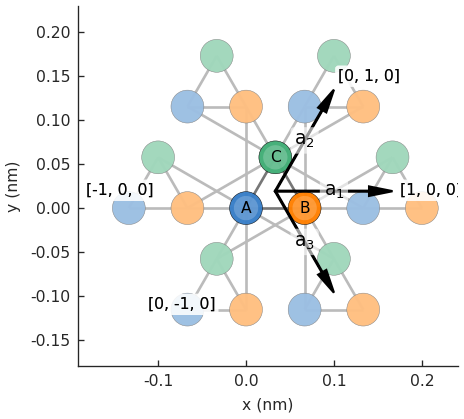

In [16]:
# A very generalized Kagome Hamiltonian model with nexr-nearest neighbour hopping; 

import pybinding as pb
from math import sqrt, pi


def Kagome_lattice(d, t_a=1, t_b=1, v_a=0, v_b=0, v_c=0, t_nnn=0):
    lat = pb.Lattice(a1=[d, 0], a2=[d/2,d*sqrt(3)/2 ],a3=[d/2,-d*sqrt(3)/2])
    lat.add_sublattices(('A', [0, 0],v_a),('B',[d/2,0],v_b),('C',[d/4,d*sqrt(3)/4],v_c))
    lat.add_hoppings(([0, 0,0], 'A', 'B', t_a),
                     ([0,0,0],'B','C',t_a),
                     ([0,0,0],'C','A',t_a),
                     ([1, 0,0], 'B', 'A', t_b),
                     ([0, 1,0], 'C', 'A', t_b),
                     ([0, 0,1], 'B', 'C', t_b),
                     ([-1, 0,0], 'A', 'C', t_nnn),
                     ([0, 0,-1], 'A', 'B', t_nnn),
                     ([0, 1,0], 'B', 'A', t_nnn),
                     ([1, 0,0], 'B', 'C', t_nnn),
                     ([0, 1,0], 'C', 'B', t_nnn),
                     ([0, 0,1], 'A', 'C', t_nnn),
#                     ([1, 0,0], 'C', 'A', t),
#                     ([0, 1,0], 'A', 'A', t),
#                     ([0, 1,0], 'B', 'B', t),
#                     ([0, 1,0], 'C', 'C', t),
#                     ([0, 1,0], 'A', 'B', t),
#                     ([0, 1,0], 'B', 'C', t),
#                     ([0, 0,1], 'A', 'A', t),
#                     ([0, 0,1], 'B', 'B', t),
#                     ([0, 0,1], 'C', 'C', t),
#                     ([0, 0,1], 'A', 'B', t),
#                     ([0, 0,1], 'C', 'A', t),
                     )
    return lat

# we can quickly set a shorter unit length `d`
lattice = Kagome_lattice(d=0.133)
lattice.plot()
plt.show()

# For a targetted LDOS, find the optimal set of hopping/onsite parameters

In [ ]:
#Ankush, can you help code up a GPR code that can loop over the Hamiltonian parameters to identify the appropriate set 
#which reproduced a given LDOS pattern on a triangular patch of Kagome? You can use the specific corner-pattern I have shwn above as the objective for now.
#Eventually this will be replaced by experiments.  